# AI ASSIGNMENT -2

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation

## Reading the csv file

In [2]:
df = pd.read_csv("C:/Users/svneh/Downloads/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


## Displaying the information about dataset

In [5]:
df.size

1200

In [6]:
df.shape

(200, 6)

In [7]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Data Preprocessing

In [11]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [12]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
## Hence there are no null values in the data set

In [14]:
duplicates = df.duplicated()
duplicates.value_counts()

False    200
dtype: int64

In [15]:
## Hence there are no duplicates in the data set

<Axes: >

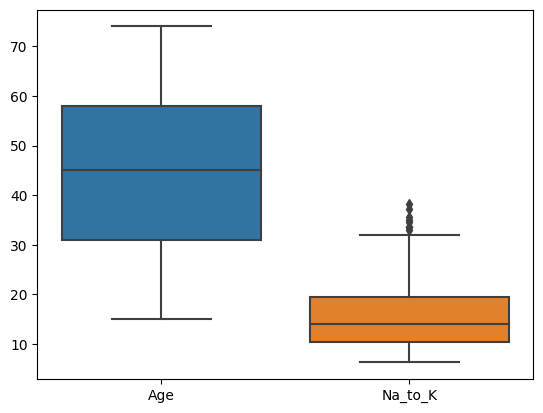

In [16]:
sns.boxplot(df)

<Axes: >

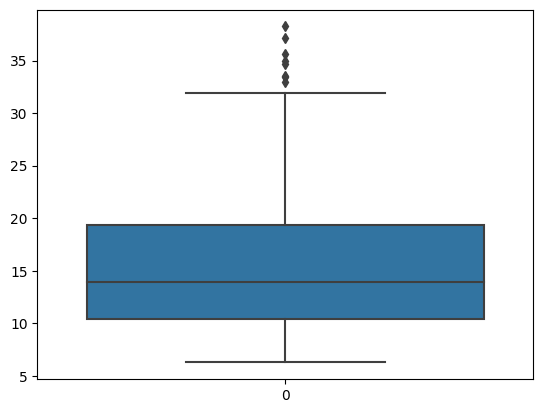

In [17]:
sns.boxplot(df['Na_to_K'])

In [18]:
q1 = df['Na_to_K'].quantile(.25)
q2 = df['Na_to_K'].quantile(.75)

In [19]:
q1

10.4455

In [20]:
q2

19.38

In [21]:
IQR = q2- q1
IQR

8.9345

In [22]:
upper_limit = q2+1.5*IQR
lower_limit = q1-1.5*IQR

In [23]:
df = df[df['Na_to_K']<upper_limit]

<Axes: >

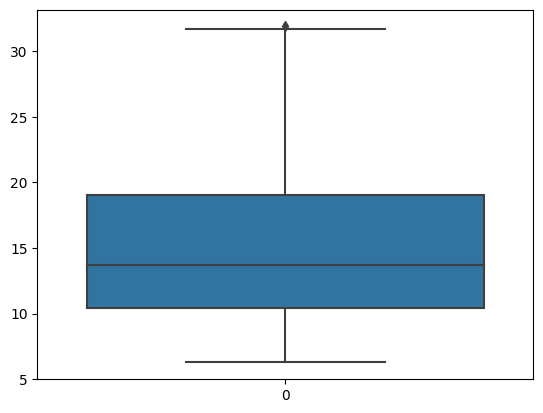

In [24]:
sns.boxplot(df['Na_to_K'])

In [25]:
## There fore the outliers are also removed from the data set
## Hence data Preprocessing is done

## Visualization

<Axes: >

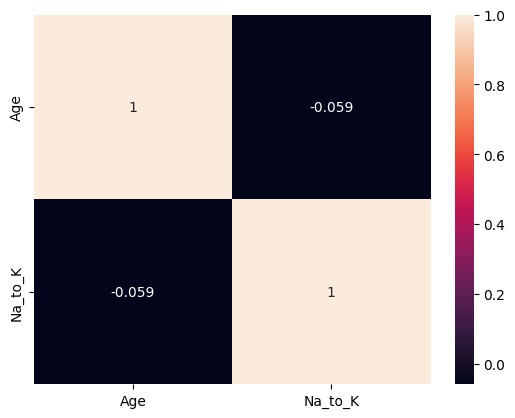

In [26]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

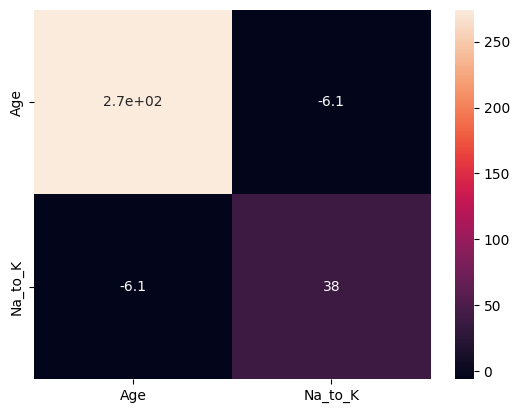

In [27]:
sns.heatmap(df.cov(),annot=True)

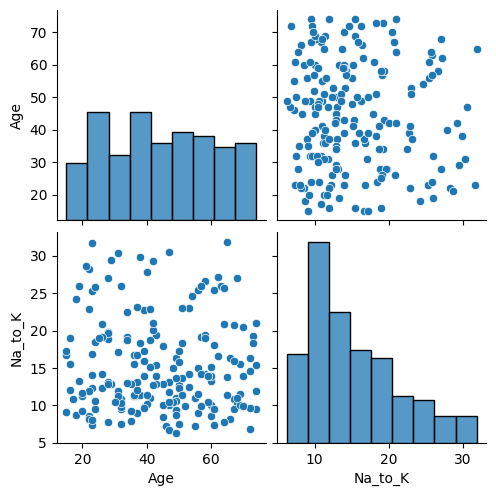

In [28]:
sns.pairplot(df)

<Axes: xlabel='Sex', ylabel='count'>

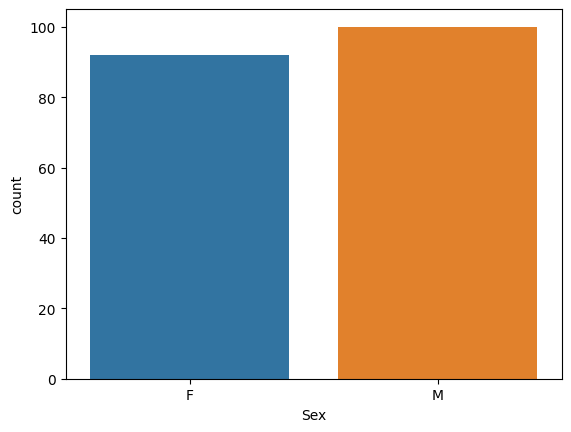

In [29]:
sns.countplot(x = df['Sex'])

## Splitting

In [30]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [31]:
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [32]:
y.head(2)

0    DrugY
1    drugC
Name: Drug, dtype: object

In [33]:
x['Sex'] = x['Sex'].replace({'F':0,'M':1})
x['BP'] = x['BP'].replace({'HIGH':0,'LOW':1,'NORMAL':2})
x['Cholesterol'] = x['Cholesterol'].replace({'HIGH':0,'NORMAL':1})

In [34]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [35]:

y = pd.get_dummies(df.iloc[:,5:]).values
y
   

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

## Splitting to training and test set

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [37]:
(xtrain.shape,ytrain.shape)

((153, 5), (153, 5))

In [38]:
(xtest.shape,ytest.shape)

((39, 5), (39, 5))

In [39]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,2,1,15.790
25,28,0,0,1,18.809
8,60,1,2,0,15.171
41,58,0,0,1,14.239
164,16,1,0,1,19.007


In [40]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
63,45,1,1,1,8.370
11,34,0,0,1,19.199
178,39,1,2,0,15.969
87,69,1,1,0,15.478
150,49,1,0,1,8.700


In [41]:
ytrain

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0,

In [42]:
ytest

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [43]:

# ANN Model

model = Sequential()
model.add(Dense(16,input_dim=5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 3,077
Trainable params: 3,077
Non-trainable params: 0
_________________________________________________________________


In [50]:

model.fit(xtrain,ytrain,epochs=20,batch_size=3,validation_data=(xtest,ytest))

Epoch 1/20
51/51 [==============================] - 2s 8ms/step - loss: 2.0217 - accuracy: 0.4314 - val_loss: 1.1951 - val_accuracy: 0.4872
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 1.1543 - accuracy: 0.4967 - val_loss: 1.1051 - val_accuracy: 0.5128
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 1.1149 - accuracy: 0.5294 - val_loss: 1.1951 - val_accuracy: 0.5641
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 1.1748 - accuracy: 0.5621 - val_loss: 1.1341 - val_accuracy: 0.5128
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.5686 - val_loss: 1.1535 - val_accuracy: 0.5128
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 1.1120 - accuracy: 0.5490 - val_loss: 1.0397 - val_accuracy: 0.5897
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 1.0297 - accuracy: 0.5817 - val_loss: 1.1152 - val_accuracy: 0.5385
Epoch 8/20
51/51 [==

In [52]:
# Testing the model

ypred = model.predict(xtest)

2/2 [==============================] - 0s 4ms/step


In [55]:

yp = model.predict([[50,1,2,0,18.809]])
yp = np.argmax(ypred)
output = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
output[yp]

1/1 [==============================] - 0s 40ms/step


'DrugY'